<a href="https://colab.research.google.com/github/edisonc57/exercises/blob/main/%D1%80%D0%B0%D1%81%D1%87%D0%B5%D1%82%D1%8B_%D1%81%D0%B2%D0%BE%D0%B9%D1%81%D1%82%D0%B2_%D0%BD%D0%B5%D1%84%D1%82%D0%B8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

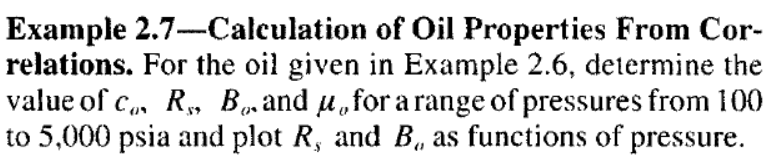

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import e

In [6]:
Rsb = 500
T = 220
sg = 0.8
api = 30
Pb= 2651.7

[ 100  150  200  250  300  350  400  450  500  550  600  650  700  750
  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450
 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050 2100 2150
 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750 2800 2850
 2900 2950 3000 3050 3100 3150 3200 3250 3300 3350 3400 3450 3500 3550
 3600 3650 3700 3750 3800 3850 3900 3950 4000 4050 4100 4150 4200 4250
 4300 4350 4400 4450 4500 4550 4600 4650 4700 4750 4800 4850 4900 4950
 5000]
[0.002365566816350221, 0.0013140227784606518, 0.0008658481346554972, 0.0006265016322247515, 0.00048096048852274337, 0.00038462415494004546, 0.0003169189672025786, 0.00026716346927521385, 0.00022931301955671208, 0.00019971437226507546, 0.0001760418428902927, 0.00015675119206269792, 0.00014078068089072305, 0.0001273785754063021, 0.00011599913166378938, 0.00010623748406042256, 9.778755346126258e-05, 9.041406421327797e-05, 8.393347795677005e-05, 7.820071713003945e-05, 7.30997389270144e-05, 6.853

,Давление psia,Коэффициент сжимаемости
0,100,0.002366
1,150,0.001314
2,200,0.000866
3,250,0.000627
4,300,0.000481


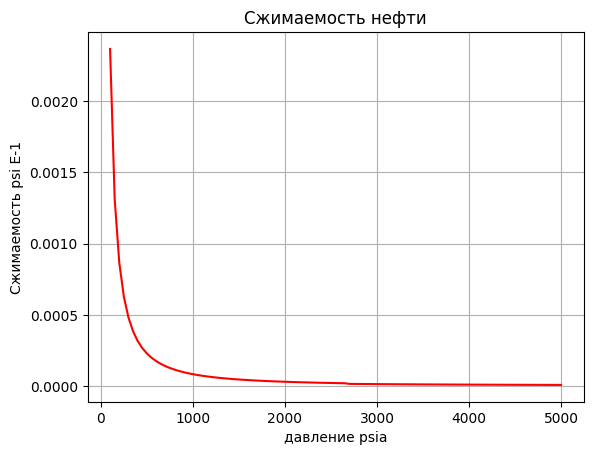

In [51]:
pressure= np.arange(100,5050,50)
Coil_lista= []

for i in range(len(pressure)):
  if pressure[i] < Pb:
    Coil= np.exp((-7.573)-(1.450 * np.log(pressure[i])) - (0.383*np.log(Pb))+ (1.402*np.log(T)) + (0.256*np.log(api)) + (0.449*np.log(Rsb)))
  if pressure[i] > Pb:
    Coil= ((5*Rsb)+(17.2*T)-(1180*sg)+(12.6*api)-(1433))/(pressure[i] * (10**5))

  Coil_lista.append(float(Coil))
plt.plot(pressure, Coil_lista, "r")
plt.title("Сжимаемость нефти")
plt.xlabel("давление psia"), plt.ylabel ("Сжимаемость psi E-1")
plt.grid()

print(pressure)
print(Coil_lista)
Coil_dataframe = pd.DataFrame({'Давление psia': pressure, 'Коэффициент сжимаемости ': Coil_lista})
df = pd.DataFrame(Coil_dataframe)
Coil_dataframe.head()


,Давление psia,газосодержание нефти
0,100,13.877493
1,150,21.622306
2,200,29.617440
3,250,37.804021
4,300,46.146474


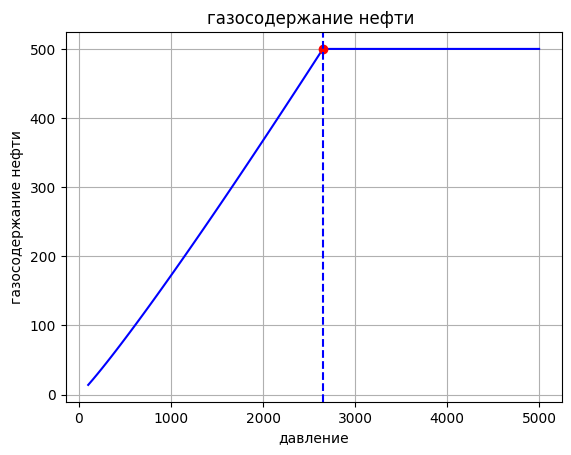

In [8]:

Rsb = 500
T = 220
sg = 0.8
Pb= 2651.7
API=30
Rs_list= []
#API= int(input(" Ingrese el API del crudo" ,  ))

if API<=30:
  c1=0.0362
  c2=1.0937
  c3=25.7240

if API>30:
  c1=0.0178
  c2=1.187
  c3= 23.9310

for i in range(len(pressure)):
  if pressure[i] < Pb:
    Rs= (pressure[i]**c2) * (c1) * (sg)* np.exp((c3*API)/(T+459.67))
  if pressure[i]> Pb:
    Rs= Rsb
  Rs_list.append(float(Rs))

x_punto=Pb
y_punto=Rsb

x_vertical = Pb
y_vertical_inicio = 0
y_vertical_fin = Rs


plt.plot(pressure, Rs_list, "b")
plt.title("газосодержание нефти ")
plt.xlabel("давление"), plt.ylabel("газосодержание нефти")
plt.plot(x_punto, y_punto, 'ro')
plt.axvline(x=x_vertical, ymin=y_vertical_inicio, ymax=y_vertical_fin, color='b', linestyle='--')
plt.grid()

Rs_dataframe = pd.DataFrame({'Давление psia': pressure, 'газосодержание нефти ': Rs_list})
df = pd.DataFrame(Rs_dataframe)
Rs_dataframe.head()



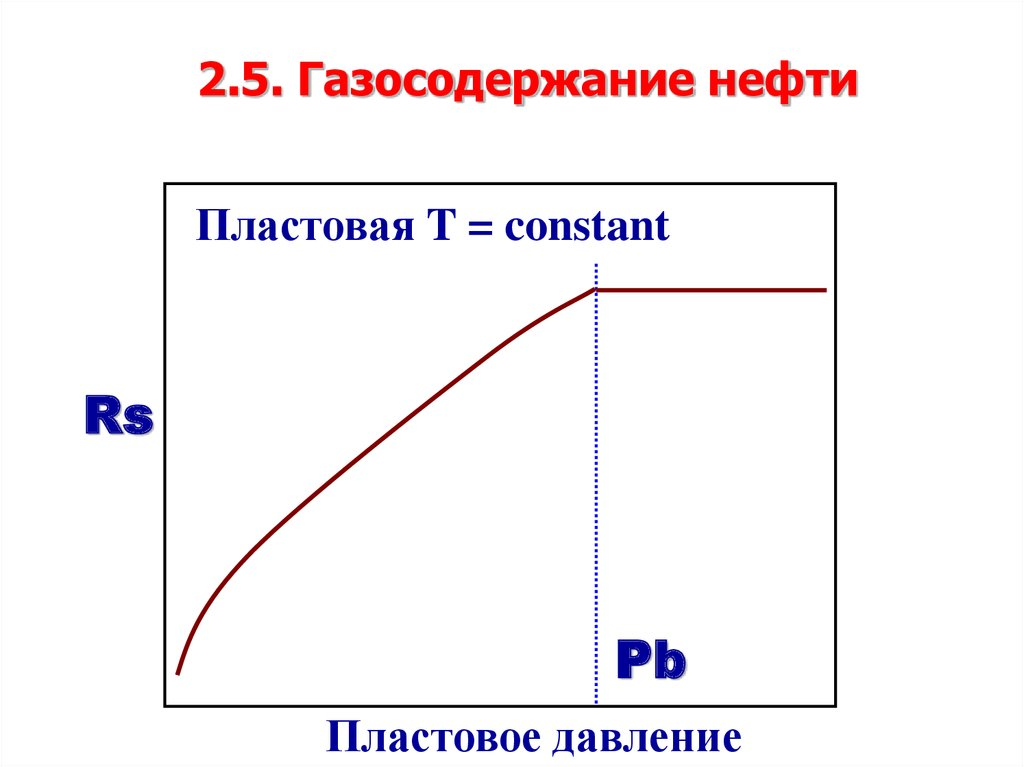

,Давление psia,объемный коэффициент нефти
0,100,1.110042
1,150,1.112823
2,200,1.115694
3,250,1.118633
4,300,1.121628
...,...,...
94,4800,1.310316
95,4850,1.309996
96,4900,1.309683
97,4950,1.309376


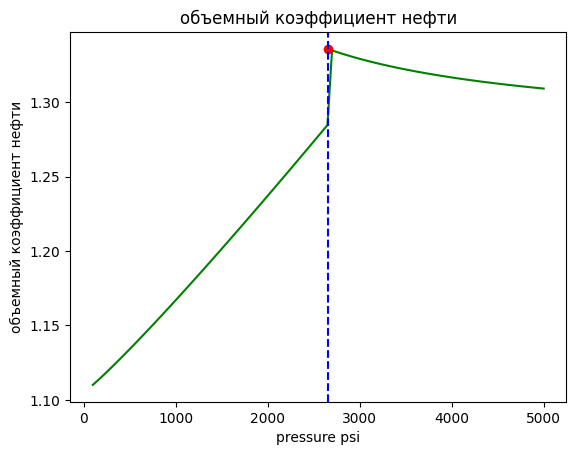

In [67]:
Rsb = 500
T = 220
sg = 0.8
Pb= 2651.7
API=30
so = 141.5 / (api + 131.5)
Bpb= 1 + ((0.0005 * Rsb) * ((sg / so)**0.25)) + ((0.0004*(T- 60)) / (so * sg))
Bo_lista=[]

if API<=30:
  c4=4.677E-4
  c5=1.751E-5
  c6=-1.8111E-8

if API>30:
  c4=4.670E-4
  c5=1.1E-4
  c6= 1.337E-9



for i in range(len(pressure)):
  if pressure[i] < Pb:
    Rs= (pressure[i]**c2) * (c1) * (sg)* np.exp((c3*API)/(T+459.67))
    Bo= 1 + (c4*Rs)+ (((c5)+(c6*Rs))*(T-60)*(API/sg))

  if pressure[i] == Pb:
    Bpb= 1 + ((0.0005 * Rsb) * ((sg / so)**0.25)) + ((0.0004*(T- 60)) / (so * sg))
    Bo=Bpb

  if pressure[i] > Pb:
    Coil= ((5*Rsb)+(17.2*T)-(1180*sg)+(12.6*api)-(1433))/(pressure[i] * 1E+05 )
    so = 141.5 / (api + 131.5)
    Bpb= 1 + ((0.0005 * Rsb) * ((sg / so)**0.25)) + ((0.0004*(T- 60)) / (so * sg))
    Bo= Bpb * np.exp(Coil *(Pb - pressure[i]))

  Bo_lista.append((Bo))

x_punto=Pb
y_punto=Bpb

x_vertical = Pb
y_vertical_inicio = 0
y_vertical_fin = Bo

plt.plot(pressure, Bo_lista,"g")
plt.plot(x_punto, y_punto, 'ro')
plt.axvline(x=x_vertical, ymin=y_vertical_inicio, ymax=y_vertical_fin, color='b', linestyle='--')
plt.title("объемный коэффициент нефти")
plt.xlabel("pressure psi"), plt.ylabel("объемный коэффициент нефти")

Bo_dataframe = pd.DataFrame({'Давление psia': pressure, 'объемный коэффициент нефти': Bo_lista})
df = pd.DataFrame(Bo_dataframe)
df

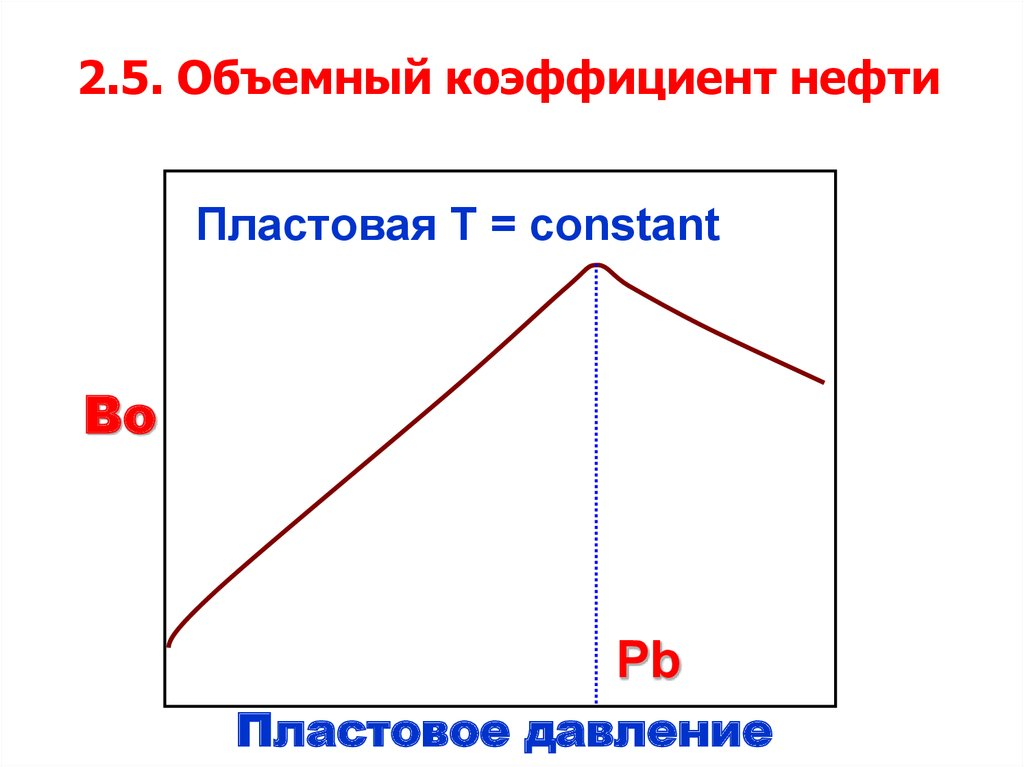